### Analyzing and Predicting "Magnificent 7" Stocks

#### Project Objective
This project provides a comprehensive analysis of the stock market performance of the "Magnificent 7" companies: *Apple (AAPL)*, *Google (GOOG)*, *Meta (META)*, *Amazon (AMZN)*, *Netflix (NFLX)*, *NVIDIA (NVDA)*, and *Tesla (TSLA)*. The objective is to understand their historical behavior, evaluate their risk and return profiles, and utilize a Monte Carlo simulation to forecast potential future performance.

In [32]:
from __future__ import division  #using this, the (/) operator retuens float value
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
import yfinance as yf
import scipy.stats as stats

### Fetching Stock Data

The initial step involves gathering historical stock data for each of the Magnificent 7 companies. The `yfinance` library is used to download daily stock prices (Open, High, Low, Close), trading volume, and other relevant metrics from Yahoo Finance. This dataset is the foundation for the subsequent analysis.

In [33]:
stock_list = ['AAPL', 'GOOG', 'META', 'AMZN', 'NFLX', 'NVDA', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end)

C:\Users\harsh\AppData\Local\Temp\ipykernel_47304\752854506.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed
C:\Users\harsh\AppData\Local\Temp\ipykernel_47304\752854506.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed
C:\Users\harsh\AppData\Local\Temp\ipykernel_47304\752854506.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed
C:\Users\harsh\AppData\Local\Temp\ipykernel_47304\752854506.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock,start,end)
[****************

### Exploratory Data Analysis (EDA)

This section focuses on exploratory data analysis to visualize and interpret the historical trends of Google stock. The analysis will cover:
- Closing Prices: To observe the overall growth and price trajectory over the past year.
- Trading Volume: To gauge market activity and investor interest.
- Moving Averages: To smooth price fluctuations and identify longer-term trends, specifically the 10-day, 25-day, and 50-day moving averages.



In [34]:
GOOG.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,183.818899,185.880391,181.569045,183.635229,2.252731e+07
std,23.552250,23.453300,23.316660,23.309196,1.032246e+07
min,146.273285,150.743919,142.361486,143.089954,6.809800e+06
25%,166.862598,168.883085,165.067884,167.292948,1.569848e+07
50%,177.316521,179.032579,175.303105,176.981814,2.069665e+07
75%,195.304394,196.997015,192.511538,194.721887,2.551180e+07
max,255.240005,256.700012,252.067993,254.779999,7.872980e+07


### Stock Price and Volume Over Time
Visualizing the closing price and trading volume to observe trends.

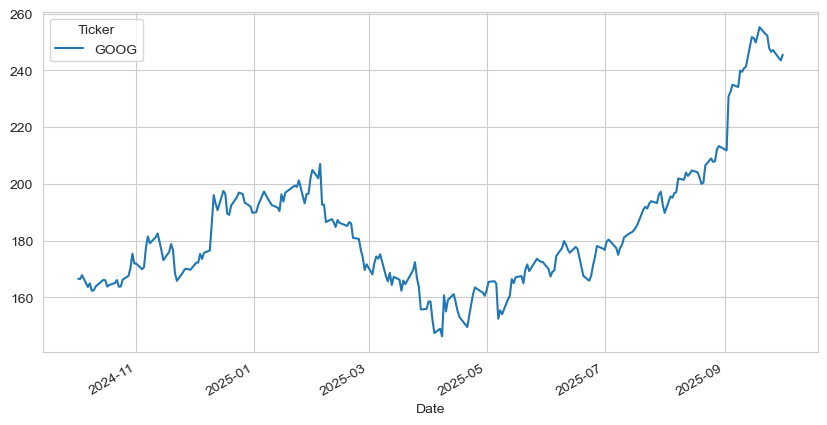

In [35]:
GOOG['Close'].plot(legend = True, figsize = (10,5))
plt.show()

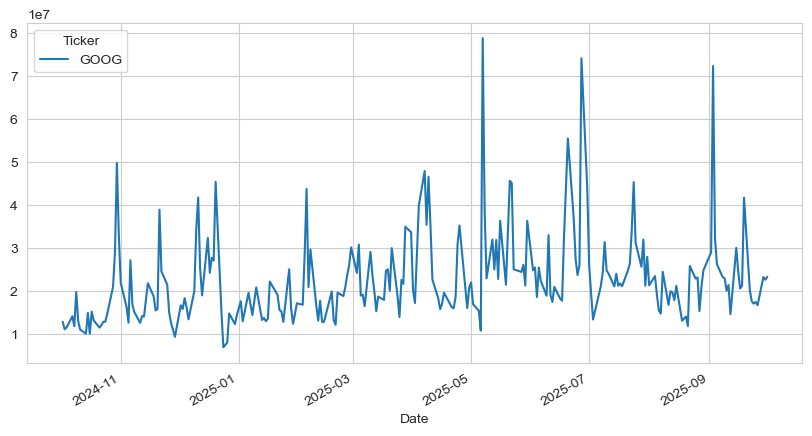

In [36]:
GOOG['Volume'].plot(legend = True, figsize = (10,5))
plt.show()

### Calculating Moving Averages
Moving averages help to smooth out price data to identify the direction of the trend.

A moving average for *n* days is the average of the closing prices for the last *n* days. It helps to reduce market noise and better understand trends.

In [37]:
averages = [10,25,50]

for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    GOOG[label] = GOOG['Close'].rolling(window = avg, center = False).mean()

GOOG.tail()

Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,
Date,,,,,,,,
2025-09-25,246.570007,247.315002,241.649994,244.839996,17379800,250.160002,232.936163,214.673705
2025-09-26,247.179993,250.119995,246.639999,247.785004,16594600,250.740001,234.805729,215.926604
2025-09-29,244.360001,251.647995,243.199997,248.274994,23157200,250.000002,236.318713,217.098325
2025-09-30,243.550003,243.675003,239.570999,243.059998,22541200,249.213002,237.701785,218.149739
2025-10-01,245.539993,247.149994,239.199997,241.179993,23197496,248.782001,239.212813,219.221770


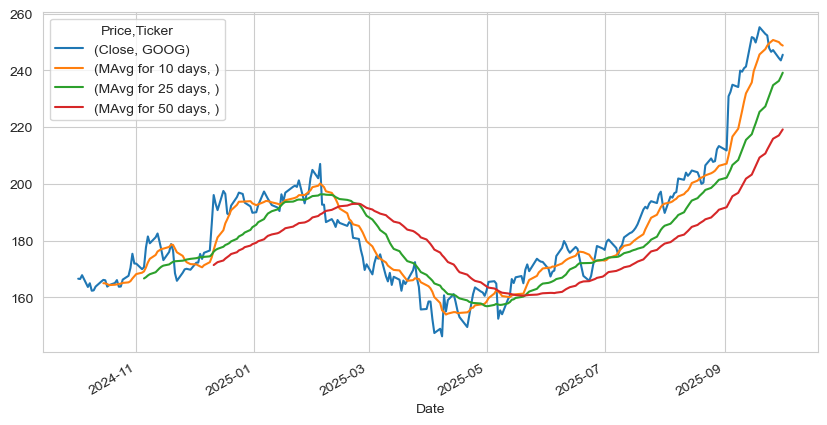

In [38]:
GOOG[['Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots=False, figsize=(10, 5))
plt.show()

The 50-day moving average is often used to gauge the market's sentiment.

- **Decrease in stock price:** In the beginning of 2025, there is a steady decrease in the stock price. This was a reaction to disappointing quarterly results.
- **Increase in May 2025:** Positive reception of Google's Gemini AI tools at the Google I/O event lead to a price increase.
- **Recent Increase:**  The stock price increased by around 9% in the beginning of September 2025 due to a lighter-than-expected antitrust penalties to Google.

### Risk and Return Analysis

Evaluating the risk of an investment is as crucial as assessing its potential returns. This section examines the risk-return profile of stock by calculating and visualizing:

- Daily Returns: To understand the day-to-day volatility.
- Correlation: To observe how the stocks move in relation to one another. Lower correlation is generally preferable for portfolio diversification.
- Risk vs. Expected Return: To quantify and compare risk (measured by standard deviation) against the expected annual return.

In [39]:
close_prices = GOOG[('Close', 'GOOG')]
daily_returns = close_prices.pct_change()
GOOG[('Daily Return', 'GOOG')] = daily_returns
GOOG.tail()

Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,,GOOG
Date,,,,,,,,,
2025-09-25,246.570007,247.315002,241.649994,244.839996,17379800,250.160002,232.936163,214.673705,-0.005084
2025-09-26,247.179993,250.119995,246.639999,247.785004,16594600,250.740001,234.805729,215.926604,0.002474
2025-09-29,244.360001,251.647995,243.199997,248.274994,23157200,250.000002,236.318713,217.098325,-0.011409
2025-09-30,243.550003,243.675003,239.570999,243.059998,22541200,249.213002,237.701785,218.149739,-0.003315
2025-10-01,245.539993,247.149994,239.199997,241.179993,23197496,248.782001,239.212813,219.221770,0.008171


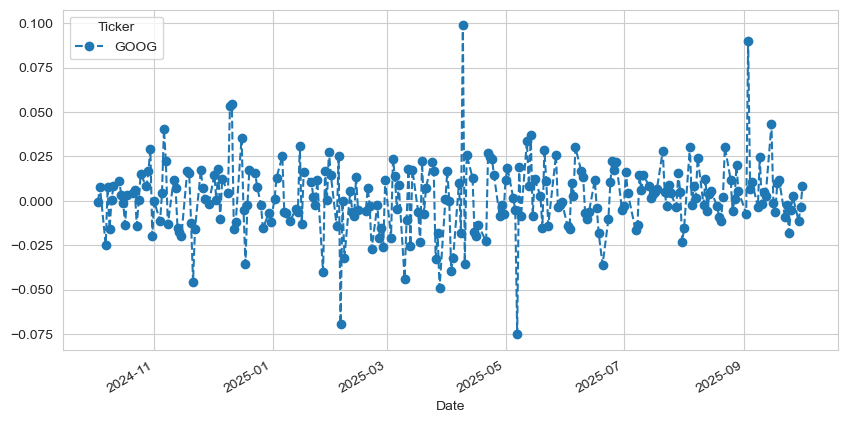

In [40]:
GOOG['Daily Return'].plot(figsize = (10,5), legend=True, linestyle='--', marker='o')
plt.show()

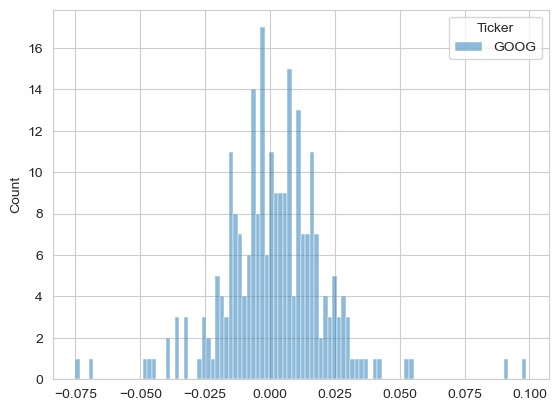

In [41]:
sns.histplot(GOOG['Daily Return'].dropna(), bins=100,color='red')
plt.show()

This distribution shows that the daily returns are mostly concentrated around **0**, which is expected for most stocks.

### Correlation Between Daily Returns of Different Stocks
Now we'll examine the relationship between the daily returns of different Magnificent 7 stocks.

Let's look at the daily return correlations between the stocks using a joint plot from Seaborn.

In [42]:
close_compr = yf.download(stock_list, start, end)['Close']
rets_compr = close_compr.pct_change()

rets_compr.tail()

C:\Users\harsh\AppData\Local\Temp\ipykernel_47304\2850576507.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close_compr = yf.download(stock_list, start, end)['Close']
[*********************100%***********************]  7 of 7 completed


Ticker,AAPL,AMZN,GOOG,META,NFLX,NVDA,TSLA
Date,,,,,,,
2025-09-25,0.018073,-0.009355,-0.005084,-0.015447,0.003563,0.004068,-0.043813
2025-09-26,-0.005489,0.007472,0.002474,-0.006890,0.001962,0.002814,0.040176
2025-09-29,-0.004032,0.010875,-0.011409,-0.000471,-0.003469,0.020540,0.006381
2025-09-30,0.000786,-0.011703,-0.003315,-0.012133,-0.006208,0.026010,0.003407
2025-10-01,0.003220,0.004828,0.008171,-0.023203,-0.023371,0.003537,0.033144


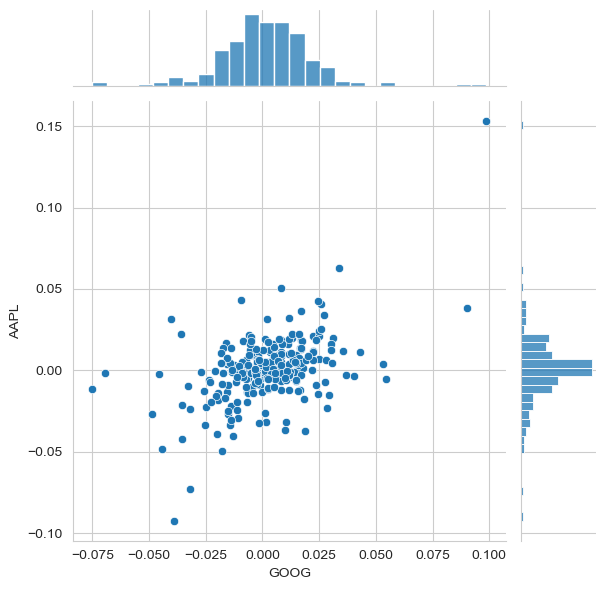

In [43]:
import scipy.stats as stats

sns.jointplot(data = rets_compr, x = 'GOOG', y ='AAPL', kind='scatter')
plt.show()

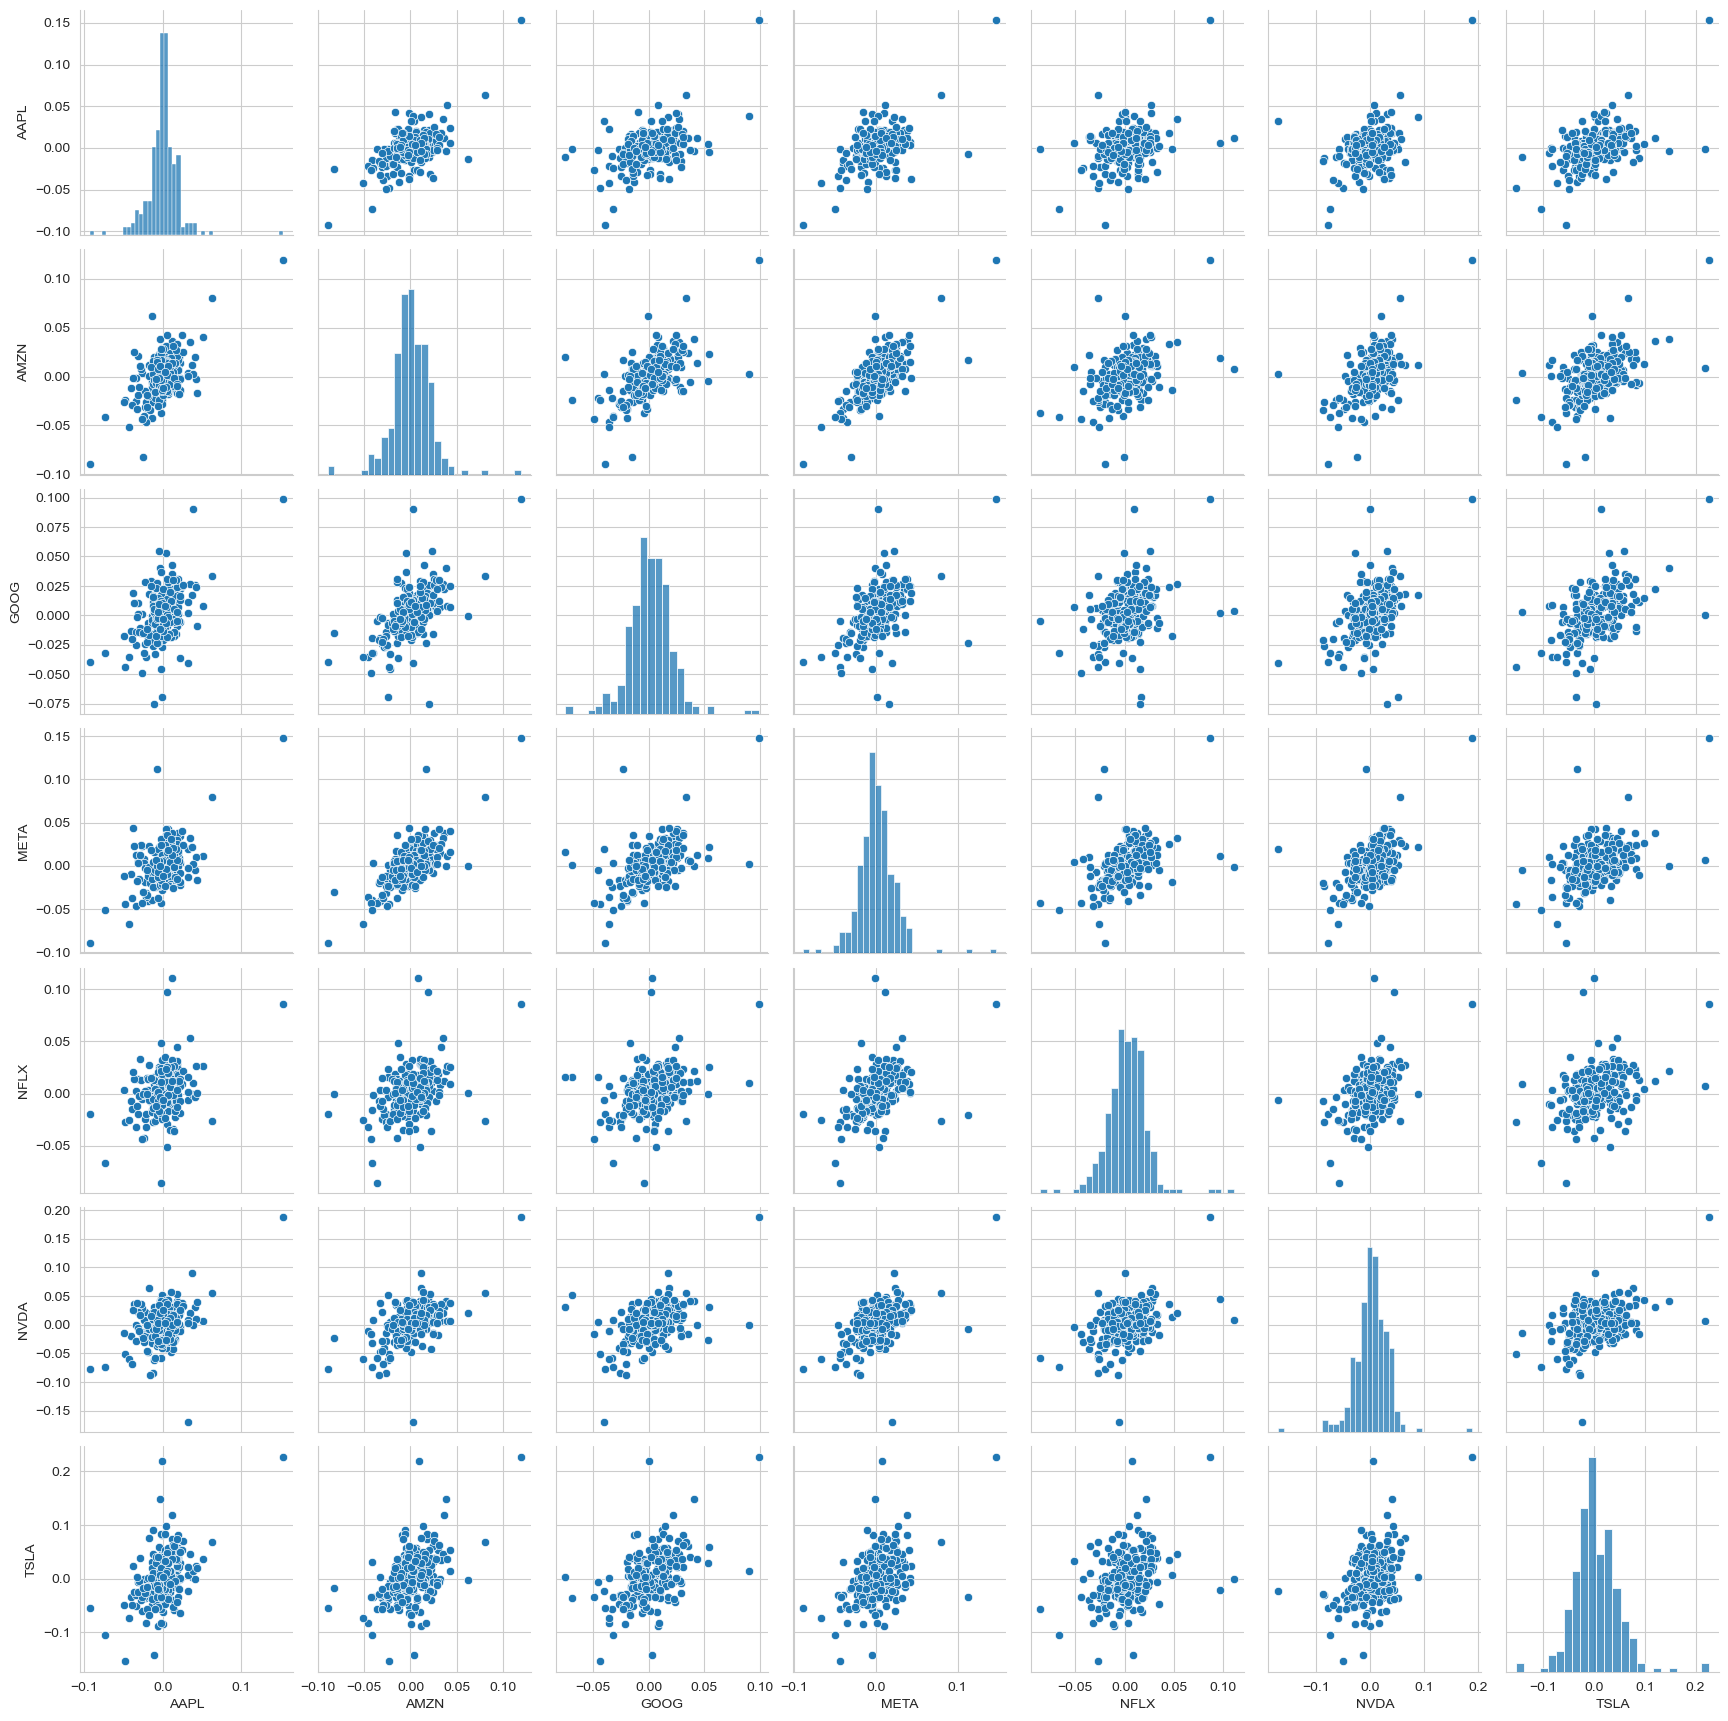

In [44]:
sns.pairplot(rets_compr.dropna())
plt.show()

In [45]:
corr = rets_compr.corr()
print(corr)

Ticker      AAPL      AMZN      GOOG      META      NFLX      NVDA      TSLA
Ticker                                                                      
AAPL    1.000000  0.585294  0.491896  0.527290  0.347140  0.427331  0.480136
AMZN    0.585294  1.000000  0.599455  0.729762  0.433916  0.562624  0.490157
GOOG    0.491896  0.599455  1.000000  0.514662  0.330814  0.471594  0.496936
META    0.527290  0.729762  0.514662  1.000000  0.441130  0.560419  0.459679
NFLX    0.347140  0.433916  0.330814  0.441130  1.000000  0.445000  0.336002
NVDA    0.427331  0.562624  0.471594  0.560419  0.445000  1.000000  0.438601
TSLA    0.480136  0.490157  0.496936  0.459679  0.336002  0.438601  1.000000


### Correlation Heatmap
A heatmap provides a clear visual representation of the correlation matrix.

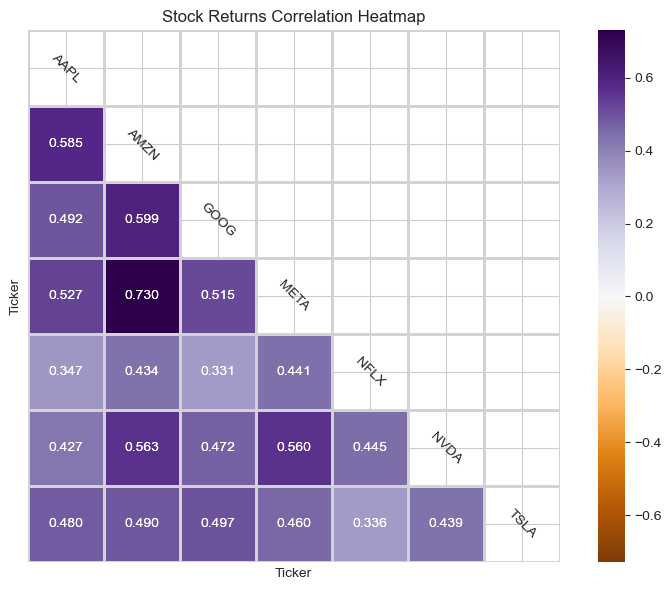

In [46]:
mask_upper = np.triu(np.ones_like(corr, dtype=bool))  # True for upper triangle[2]
mask_lower = mask_upper[::-1, :]                      # Flip rows for lower triangle[2]

# 4. Determine symmetric vmin/vmax for centered diverging palette
vmax = np.abs(corr.values[~mask_upper]).max()  # max absolute corr in lower triangle[2]

# 5. Plot heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr,
    mask=mask_upper,            # hide upper triangle
    annot=True,                 # display correlation values
    fmt=".3f",                  # three decimal places
    cmap="PuOr",                # Purple–Orange diverging palette
    vmin=-vmax, vmax=vmax,      # center palette at zero
    square=True, linewidths=1,  # square cells with grid lines
    linecolor="lightgray"
)
# 6. Add lower‐triangle annotations manually for the flipped half
for i in range(len(corr)):
    plt.text(i+0.5,(i+0.5), corr.columns[i], ha = 'center', va = 'center', rotation = -45)
    for j in range(i + 1, len(corr)):
        value = corr.values[j, i]
        plt.text(i + 0.5, j + 0.5, f"{value:.3f}",
                 ha="center", va="center", color="white")

ax.tick_params(axis='both', which='both', labelbottom=False, labelleft=False)

plt.title("Stock Returns Correlation Heatmap")
plt.tight_layout()
plt.show()

A high degree of correlation is observed among most of these tech companies. This suggests that macroeconomic factors impacting the tech industry tend to affect these stocks similarly, which limits the diversification benefits when investing exclusively in this group.

Also, it can be observed that the strongest correlation is between the AMZN and META stock having the correlation value of 0.736, maybe due to their joint venture of seamless Amazon shopping experience through META ads on their social networking platforms or maybe them being companies having advertisment revenue as a good portion of revenue

<h3> Determining the Value from Risk vs Expected Return

In [47]:
market_data = yf.download('^GSPC', start=start, end=end)['Close']
close_compr['^GSPC'] = market_data
rets_compr['^GSPC'] = close_compr['^GSPC'].pct_change()

def calculate_beta(stock_returns, market_returns):

    stock_returns = stock_returns.dropna()
    market_returns = market_returns.dropna()

    stock_returns, market_returns = stock_returns.align(market_returns, join='inner')

    covariance = np.cov(stock_returns, market_returns)[0, 1]
    variance = np.var(market_returns)
    beta = covariance / variance
    return beta


C:\Users\harsh\AppData\Local\Temp\ipykernel_47304\155212636.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_data = yf.download('^GSPC', start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed


In [48]:
# Calculate beta for each Magnificent 7 stocks
betas = {}
for stock in stock_list:  # Using your existing stock_list
    stock_returns = rets_compr[stock]
    market_returns = rets_compr['^GSPC']
    beta = calculate_beta(stock_returns, market_returns)
    betas[stock] = beta
    print(f"Beta for {stock}: {beta:.4f}")

# Create a DataFrame for better visualization
beta_df = pd.DataFrame(list(betas.items()), columns=['Stock', 'Beta'])
beta_df = beta_df.sort_values('Beta', ascending=False)


Beta for AAPL: 1.2943
Beta for GOOG: 1.0534
Beta for META: 1.4256
Beta for AMZN: 1.3863
Beta for NFLX: 0.9353
Beta for NVDA: 1.9345
Beta for TSLA: 2.4190


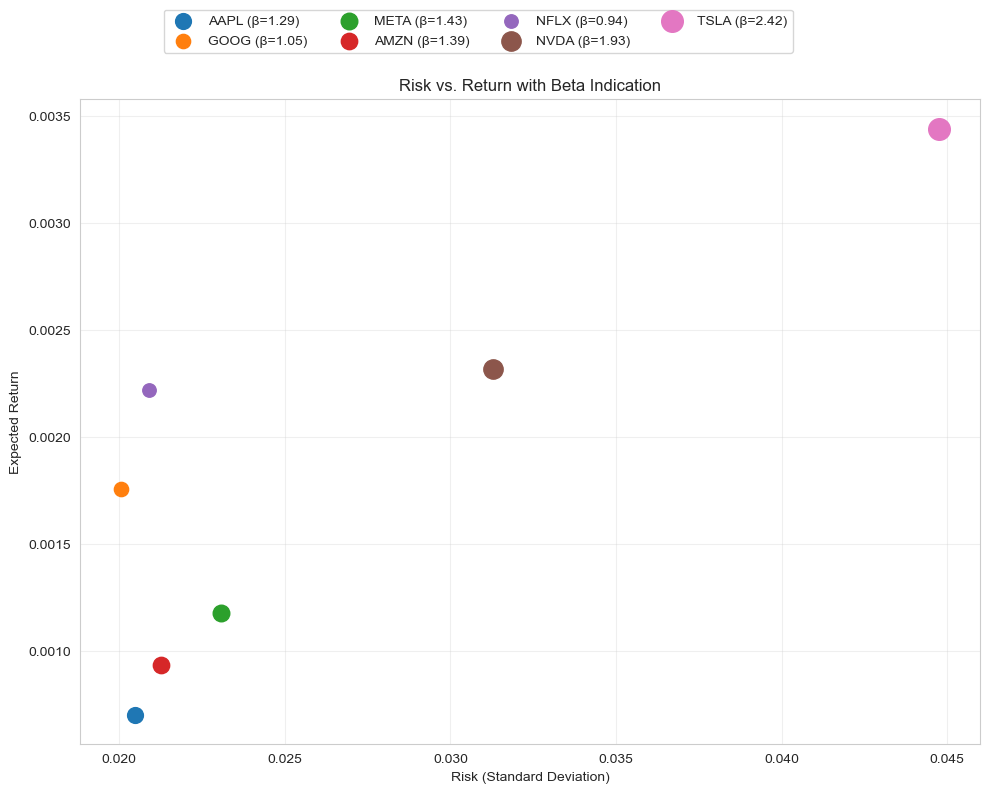

In [49]:
# Enhance the existing risk-return scatter plot with beta information
rets_filled = rets_compr.dropna()
plt.figure(figsize=(10, 8))

# Get mean returns and standard deviations
mean_returns = rets_compr.mean()
std_returns = rets_compr.std()

# Create scatter plot with point size based on beta
for stock in stock_list:
    if stock in betas:
        # Size points based on beta (larger point = higher beta)
        size = betas[stock] * 100
        plt.scatter(std_returns[stock], mean_returns[stock], s=size,
                   label=f"{stock} (β={betas[stock]:.2f})")

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Risk vs. Return with Beta Indication')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(0.8, 1.15), ncol=4)
plt.tight_layout()
plt.show()

An ideal investment profile targets the highest return for the lowest risk (top-left quadrant). Based on the data, **TESLA** has offered the highest returns, but this was accompanied by the highest risk. The **Beta**, represented by the color, measures a stock's volatility in relation to the overall market. A beta greater than 1 suggests the stock is more volatile than the market, while a beta less than 1 indicates it's less volatile. TESLA's high beta is consistent with its position as the riskiest asset in this group, signifying greater sensitivity to market fluctuations.

In [50]:
rets_compr['GOOG'].quantile(q=0.05)

-0.029994965439418507

In [51]:
rets_compr['GOOG'].quantile(q=0.01)

-0.04731503442918801

From the empirical quantiles given for both confience intervals, we know that the worst possible loss will not exceed 3.53 percent with 95% confidence and 4.96 percent with 99% confidence.

## Risk Analysis with Monte Carlo Simulations
A **Monte Carlo simulation** is employed here to forecast potential risk of loss. This statistical technique models future price paths by generating thousands of random outcomes based on the stock's historical volatility and expected return (drift). By simulating 10,000 different paths, we can create a distribution of possible ending prices for the next year. <br>
We'll use a Monte Carlo simulation to estimate the Value at Risk (VaR) for Google's stock.

**Value at Risk (VaR)** is a statistical measure of the risk of loss for an investment. It estimates how much a set of investments might lose (with a given probability), given normal market conditions, in a set time period such as a day.

We run the Monte Carlo Method on the **GBM (Geometric Brownian Motion)** model to assess the stability and predict the future risk of our stocks. For this component, I'll be analyzing Google's stock.

In [52]:
def stock_monte_carlo(start_price, days, mu, sigma, n_simulations):
    dt = 1/252
    price = np.zeros((days,n_simulations))
    price[0,:] = start_price

    for t in range(1, days):
        Z = np.random.standard_normal(n_simulations)
        price[t,:] = price[t-1,:] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return price


In [53]:
days = 252
stock_list = ['GOOG']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

close = yf.download(stock_list, start, end)['Close']
log_returns = np.log(close / close.shift(1)).dropna()
mu = log_returns.mean().values[0] * 252
sigma = log_returns.std().values[0] * np.sqrt(252)
start_price = close.iloc[-1].values[0]
n_simulations = 100

simulation  = stock_monte_carlo(start_price,days,mu,sigma,n_simulations)
print("Shape of simulation results array:", simulation.shape)

C:\Users\harsh\AppData\Local\Temp\ipykernel_47304\2076517439.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close = yf.download(stock_list, start, end)['Close']
[*********************100%***********************]  1 of 1 completed

Shape of simulation results array: (252, 100)


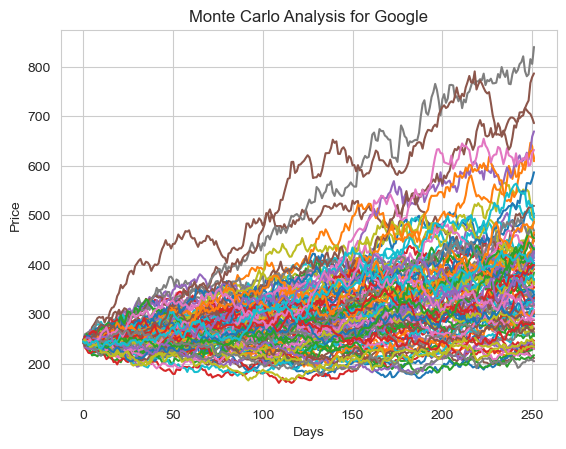

In [54]:
plt.plot(simulation)
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')
plt.show()

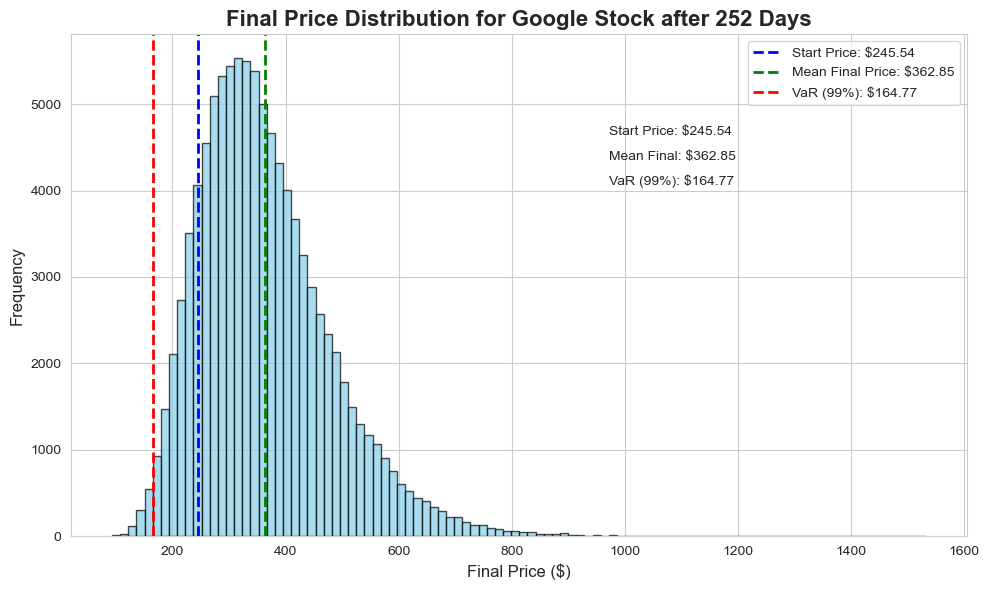

In [55]:
runs = 100000
simulations = stock_monte_carlo(start_price,days,mu,sigma,runs)
final_prices = simulations[-1, :]

var_99 = np.percentile(final_prices, 1)

plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=100, color='skyblue', edgecolor='black', alpha=0.7)

plt.text(0.6, 0.8, f"Start Price: ${start_price:.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.75, f"Mean Final: ${final_prices.mean():.2f}", transform=plt.gca().transAxes)
plt.text(0.6, 0.7, f"VaR (99%): ${var_99:.2f}", transform=plt.gca().transAxes)

plt.axvline(x=start_price, color='blue', linestyle='--', linewidth=2, label=f"Start Price: ${start_price:.2f}")
plt.axvline(x=final_prices.mean(), color='green', linestyle='--', linewidth=2, label=f"Mean Final Price: ${final_prices.mean():.2f}")
plt.axvline(x=var_99, color='red', linestyle='--', linewidth=2, label=f"VaR (99%): ${var_99:.2f}")

plt.title(f"Final Price Distribution for Google Stock after {days} Days", weight='bold', fontsize=16)
plt.xlabel("Final Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The Histogram represents the distribution of final simulated prices of Google stock after a trading year and here VaR (99%) = $165.74, which means that we have 99% confidence that the Google stock will not be less than $165.74. 

While this individual simulation is insightful, its primary limitation is the assumption that stocks move independently. As the correlation heatmap clearly showed, the returns of the Magnificent 7 stocks are highly correlated. Analyzing each stock in isolation does not make sense from a risk management perspective. To tackle this problem, the analysis must shift to a portfolio view where the simulated price paths are determined by the covariance between the stocks.

### Portfolio Risk Assessment: Value at Risk (VaR)
Following the individual stock analysis, this section assesses the risk of an equally weighted portfolio of all seven stocks. We utilize the Value at Risk (VaR) metric, a statistical measure that estimates the maximum expected loss over a specific period at a given confidence level. For this analysis, we will calculate the 95% VaR.

In [56]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

stock_list = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']

end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(years=5)
stock_data = yf.download(stock_list, start=start_date, end=end_date)['Close']

log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

print("Log Returns (last 5 days):")
print(log_returns.tail())


C:\Users\harsh\AppData\Local\Temp\ipykernel_47304\2528505611.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_list, start=start_date, end=end_date)['Close']
[*********************100%***********************]  7 of 7 completed

Log Returns (last 5 days):
Ticker          AAPL      AMZN     GOOGL      META      MSFT      NVDA  \
Date                                                                     
2025-09-25  0.017912 -0.009399 -0.005477 -0.015568 -0.006135  0.004060   
2025-09-26 -0.005504  0.007444  0.003047 -0.006914  0.008699  0.002810   
2025-09-29 -0.004040  0.010816 -0.010151 -0.000471  0.006120  0.020332   
2025-09-30  0.000786 -0.011772 -0.003900 -0.012208  0.006489  0.025678   
2025-10-01  0.003215  0.004816  0.007377 -0.023477  0.003392  0.003531   

Ticker          TSLA  
Date                  
2025-09-25 -0.044802  
2025-09-26  0.039390  
2025-09-29  0.006360  
2025-09-30  0.003401  
2025-10-01  0.032607  


In [57]:
#Covariance Matrix of Daily Returns
cov_matrix = log_returns.cov()

cov_matrix.head()

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Ticker,,,,,,,
AAPL,0.000323,0.000231,0.000204,0.000249,0.000190,0.000309,0.000338
AMZN,0.000231,0.000489,0.000272,0.000376,0.000245,0.000412,0.000373
GOOGL,0.000204,0.000272,0.000382,0.000313,0.000214,0.000340,0.000298
META,0.000249,0.000376,0.000313,0.000768,0.000269,0.000455,0.000360
MSFT,0.000190,0.000245,0.000214,0.000269,0.000268,0.000341,0.000261


#### Covariance and Cholesky Decomposition
The **covariance matrix** shows how the returns of different stocks move together. The **Cholesky decomposition** is a way to break down this matrix to generate correlated random variables for our simulation.

In [58]:
#Cholesky Decomposition
cholesky_decomp = np.linalg.cholesky(cov_matrix)

In [59]:

print("Covariance Matrix:")
print(cov_matrix)
print("\nCholesky Decomposition (Lower Triangular Matrix):")
print(cholesky_decomp)


Covariance Matrix:
Ticker      AAPL      AMZN     GOOGL      META      MSFT      NVDA      TSLA
Ticker                                                                      
AAPL    0.000323  0.000231  0.000204  0.000249  0.000190  0.000309  0.000338
AMZN    0.000231  0.000489  0.000272  0.000376  0.000245  0.000412  0.000373
GOOGL   0.000204  0.000272  0.000382  0.000313  0.000214  0.000340  0.000298
META    0.000249  0.000376  0.000313  0.000768  0.000269  0.000455  0.000360
MSFT    0.000190  0.000245  0.000214  0.000269  0.000268  0.000341  0.000261
NVDA    0.000309  0.000412  0.000340  0.000455  0.000341  0.001067  0.000584
TSLA    0.000338  0.000373  0.000298  0.000360  0.000261  0.000584  0.001470

Cholesky Decomposition (Lower Triangular Matrix):
[[0.01797445 0.         0.         0.         0.         0.
  0.        ]
 [0.01282376 0.01802565 0.         0.         0.         0.
  0.        ]
 [0.01132681 0.00703972 0.01427251 0.         0.         0.
  0.        ]
 [0.01385325 0.

This function simulates the future price paths for a portfolio of stocks, taking into account their covariances.

In [60]:
def portfolio_monte_carlo(log_returns, cholesky_decomp, start_prices, days, num_simulations):
    num_stocks = len(start_prices)
    simulation_results = np.zeros((days, num_simulations, num_stocks))
    simulation_results[0, :, :] = start_prices

    mean_returns = log_returns.mean().values
    variances = log_returns.var().values
    drift = mean_returns - (0.5 * variances)

    for i in range(1, days):
        uncorrelated_random = np.random.normal(0, 1, (num_simulations, num_stocks))
        correlated_random = uncorrelated_random @ cholesky_decomp.T
        simulated_daily_returns = np.exp(drift + correlated_random)
        simulation_results[i, :, :] = simulation_results[i-1, :, :] * simulated_daily_returns

    return simulation_results


In [61]:
start_prices = stock_data.iloc[-1].values
days_to_simulate = 252
num_simulations = 10000

portfolio_simulations = portfolio_monte_carlo(log_returns, cholesky_decomp, start_prices, days_to_simulate, num_simulations)
print("Shape of simulation results array:", portfolio_simulations.shape)

Shape of simulation results array: (252, 10000, 7)


### Visualizing a Single Stock Simulation
Here, we plot the simulated price paths for a single stock from the portfolio.

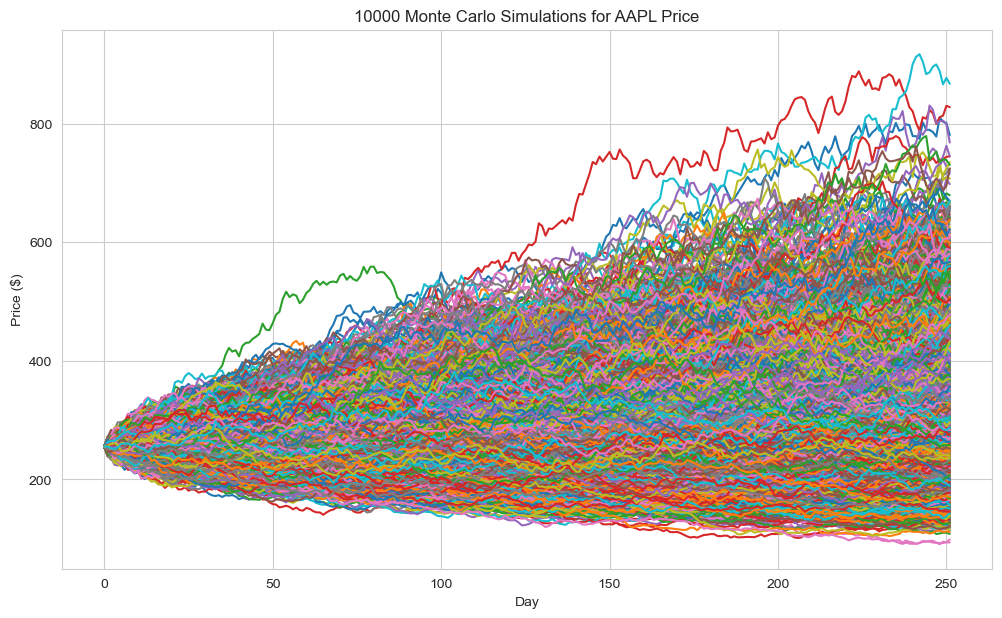

In [62]:
# Select a stock to visualize, e.g., the first one (AAPL)
stock_to_visualize_index = 0
stock_name = stock_list[stock_to_visualize_index]

plt.figure(figsize=(12, 7))
# Plot every one of the 1000 simulated paths for the selected stock
plt.plot(portfolio_simulations[:, :, stock_to_visualize_index])
plt.title(f"10000 Monte Carlo Simulations for {stock_name} Price")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


Initial Portfolio Value (Equally Weighted): $372.10
--------------------------------------------------
95% Value at Risk (VaR) for 1 Year: -28.57
This means that based on our simulation, we are 95% confident that our portfolio will not lose more than -28.57 of its value over the next year.
There is a 5% chance that the losses could be greater than this amount.


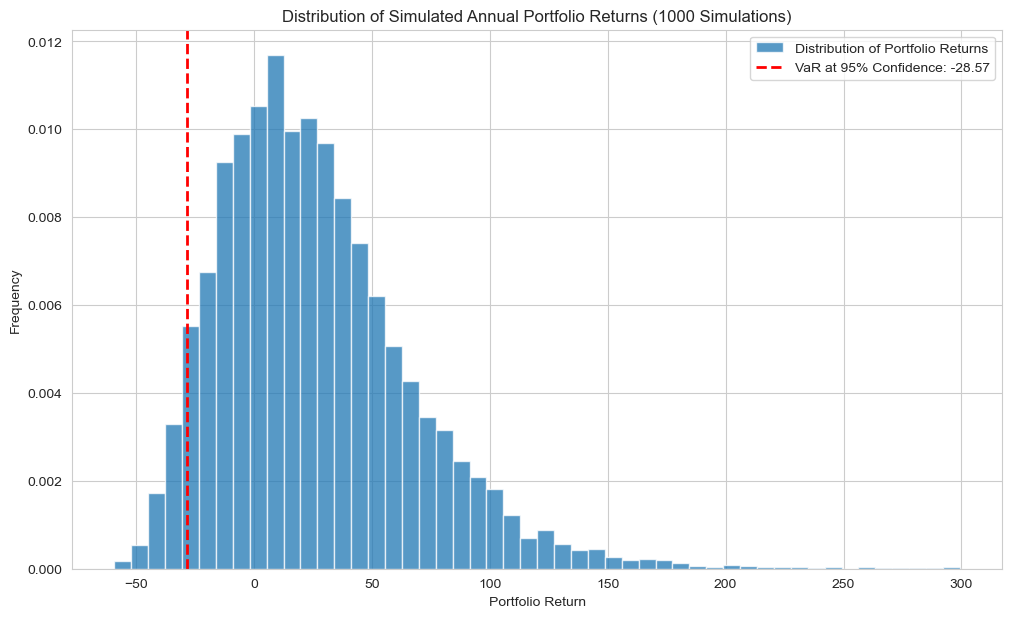

In [63]:
num_stocks = len(stock_list)
portfolio_weights = np.array([1/num_stocks] * num_stocks)

initial_portfolio_value = np.sum(start_prices * portfolio_weights)
final_simulated_prices = portfolio_simulations[-1, :, :]
final_simulated_portfolio_values = np.sum(final_simulated_prices * portfolio_weights, axis=1)
portfolio_returns = (final_simulated_portfolio_values - initial_portfolio_value) * 100 / initial_portfolio_value

confidence_level = 0.95
var_95 = np.percentile(portfolio_returns, 100 * (1 - confidence_level))

print(f"Initial Portfolio Value (Equally Weighted): ${initial_portfolio_value:.2f}")
print("-" * 50)
print(f"95% Value at Risk (VaR) for 1 Year: {var_95:.2f}")
print(f"This means that based on our simulation, we are 95% confident that our portfolio will not lose more than {var_95:.2f} of its value over the next year.")
print(f"There is a 5% chance that the losses could be greater than this amount.")

# --- Visualize the distribution of portfolio returns ---
plt.figure(figsize=(12, 7))
plt.hist(portfolio_returns, bins=50, density=True, alpha=0.75, label='Distribution of Portfolio Returns')
plt.axvline(var_95, color='r', linestyle='--', linewidth=2, label=f'VaR at 95% Confidence: {var_95:.2f}')
plt.title("Distribution of Simulated Annual Portfolio Returns (1000 Simulations)")
plt.xlabel("Portfolio Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


Analysis of Value at Risk (VaR): The histogram displays the distribution of simulated annual returns for the equally weighted portfolio.
- The 95% VaR is -28.97%. This figure indicates that there is a 95% confidence level that the portfolio will not lose more than 28.97% of its value over the next year.
- Conversely, there is a 5% chance that the portfolio's losses could exceed this amount.

This metric provides a single, concise measure of the portfolio's downside risk and is a crucial input for risk management and strategic investment decisions.

### Conclusion

This analysis provided an in-depth review of the performance and risk characteristics of the "Magnificent 7" stocks. The key findings are as follows:

- **Varying Risk Profiles**: Despite the strong performance, the risk profiles vary among the stocks. Companies like Tesla and NVIDIA exhibit higher volatility, which translates to both higher risk and the potential for greater returns. In contrast, firms like Google and Apple have shown lower volatility.

- **High Correlation**: The analysis revealed a strong positive correlation among the Magnificent 7, implying they are often influenced by the same market forces. While they are powerful growth stocks, a portfolio composed exclusively of these stocks lacks diversification against sector-specific risks.

- **Positive Future Outlook (with Uncertainty)**: The Monte Carlo simulations suggested a generally positive outlook for future stock prices based on historical trends. However, the wide distribution of potential outcomes underscores the market's inherent uncertainty. It is important to note that these simulations are probabilistic forecasts, not guarantees of future performance.

- **Quantified Portfolio Risk**: The Value at Risk (VaR) calculation for an equally weighted portfolio provided a concrete measure of downside risk. The 95% VaR of approximately -29% serves as a critical data point for any investor, highlighting the potential losses that could be incurred in an adverse market scenario.

In summary, the Magnificent 7 stocks present a compelling, albeit high-risk, investment opportunity. Their high correlation necessitates careful consideration of diversification with other asset classes to mitigate sector-specific risks.